## ***Load Iris Dataset***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')


df_iris = sns.load_dataset('iris')
df_iris.drop_duplicates(inplace=True)
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [2]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## ***Baseline model***

Classification report of Baseline Model:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      0.92      0.89        13
   virginica       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



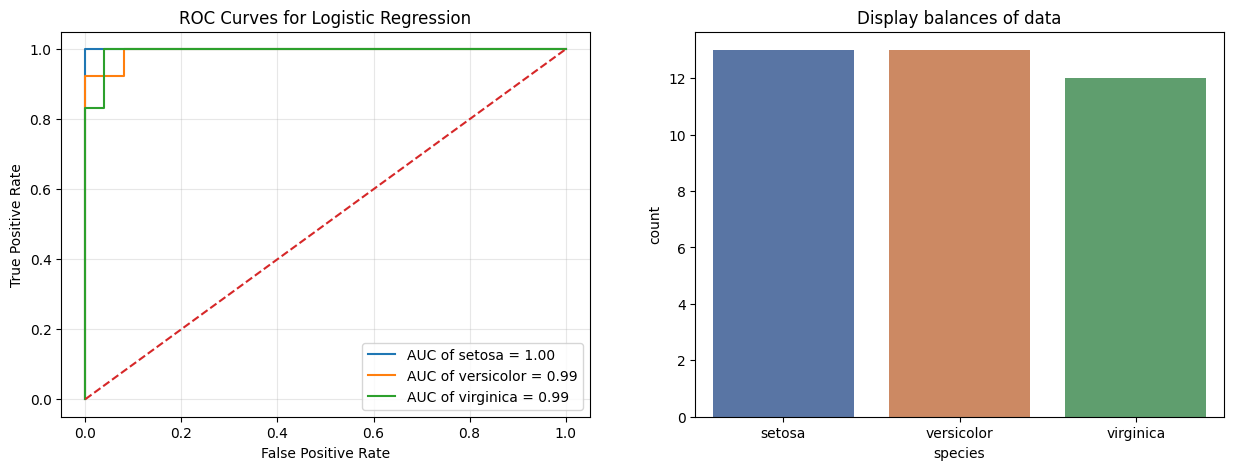

(LogisticRegression(C=0.8, l1_ratio=0.7, multi_class='multinomial',
                    penalty='elasticnet', solver='saga'),
 StandardScaler())

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve
from sklearn.preprocessing import label_binarize


def baseline(data, model, unseen=None, test_size=0.25):
    X = data.drop(['species'], axis=1)
    y = data['species']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=42, stratify=y)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    if not unseen:
        print(f'Classification report of Baseline Model:\n{classification_report(y_test, y_predict)}')
    
        #============= ROC Curve===========
        y_pred_proba = model.predict_proba(X_test)
        classes = model.classes_
        y_test_bin = label_binarize(y_test, classes=classes)
        fig, ax = plt.subplots(1,2, figsize=(15, 5))
        for i in range(y_pred_proba.shape[1]):
            fpr, tpr, threshold = roc_curve(y_test_bin[:,i], y_pred_proba[:,i])
            roc_auc = auc(fpr, tpr)
            ax[0].plot(fpr, tpr, label=f'AUC of {classes[i]} = {roc_auc:.2f}')
    
        ax[0].plot([0,1], [0,1], linestyle='dashed')
        ax[0].set_xlabel('False Positive Rate')
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_title('ROC Curves for Logistic Regression')
        ax[0].grid(alpha=0.3)
        ax[0].legend()
        
    
        sns.countplot(x=y_test, palette='deep', ax=ax[1])
        ax[1].set_title('Display balances of data')
        plt.show()


    return model, sc


clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.7, C=.8, multi_class='multinomial')
baseline(df_iris, clf)

##### ✅ ***The baseline model performs very well, achieving 92% accuracy. This exceptional performance is expected given the small size of the Iris dataset (only 150 rows).***

In [4]:
import sys
def predict_new(model, scaler, sample):
    import pandas as pd
    df_sample = pd.DataFrame([sample])
    df_sample_scaled = scaler.transform(df_sample)
    prediction = model.predict(df_sample_scaled)
    print(f"✅ Predicted class: {prediction[0]}")

trained_model, trained_scaler = baseline(df_iris, clf, 1)

try:
    unseen_sample = []
    for param in ['sepal_length' ,'sepal_width' ,'petal_lengt' ,'petal_width']:
        p = float(input(param+': '))
        unseen_sample.append(p)

    predict_new(trained_model, trained_scaler, unseen_sample)       # [5.1,3.5,1.4,0.2]

except:
    print('PLease enter a float values!')

sepal_length:  4.6
sepal_width:  2.2
petal_lengt:  1.9
petal_width:  0.335


✅ Predicted class: setosa
